In [9]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [11]:
path = "Automobile_data.csv"
df = pd.read_csv(path)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [12]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [13]:
# Data Exploration 
#df.describe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [24]:
print(df.duplicated().sum())

0


In [28]:
# Check if there is any special character present as value in thedataset
# Handling missing values (replace '?' with NaN and drop missing values)
df.replace("?", np.nan, inplace=True) # replaces all occurrences of "?" in the df with NaN
df.dropna(inplace=True) # removes any rows in the DataFrame that contain NaN values
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102.0,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115.0,5500,18,22,17450.0
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110.0,5500,19,25,17710.0
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140.0,5500,17,20,23875.0
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101.0,5800,23,29,16430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400,23,28,16845.0
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300,19,25,19045.0
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500,18,23,21485.0
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106.0,4800,26,27,22470.0


In [32]:
# Converting necessary columns to numeric
for col in ["horsepower", "price"]: 
    df[col] = pd.to_numeric(df[col], errors="coerce") # Figure out what pd.to_numeric()is doing?
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102.0,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115.0,5500,18,22,17450.0
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110.0,5500,19,25,17710.0
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140.0,5500,17,20,23875.0
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101.0,5800,23,29,16430.0


In [33]:
df['horsepower'].dtype

dtype('float64')

In [43]:
# Encoding categorical columns
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
pd.set_option('display.max_columns', None)  # Show all columns
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,27,0,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,2,2,109,4,12,20,10.0,102.0,15,24,30,13950.0
4,2,27,0,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,2,1,136,4,12,20,8.0,115.0,15,18,22,17450.0
6,1,25,0,1,0,0,3,1,0,105.8,192.7,71.4,55.7,2844,2,1,136,4,12,20,8.5,110.0,15,19,25,17710.0
8,1,25,0,1,1,0,3,1,0,105.8,192.7,71.4,55.9,3086,2,1,131,4,9,20,8.3,140.0,15,17,20,23875.0
10,2,31,1,1,0,1,3,2,0,101.2,176.8,64.8,54.3,2395,2,2,108,4,22,4,8.8,101.0,17,23,29,16430.0


# Step 1: Correlation Matrix (Filter Method)

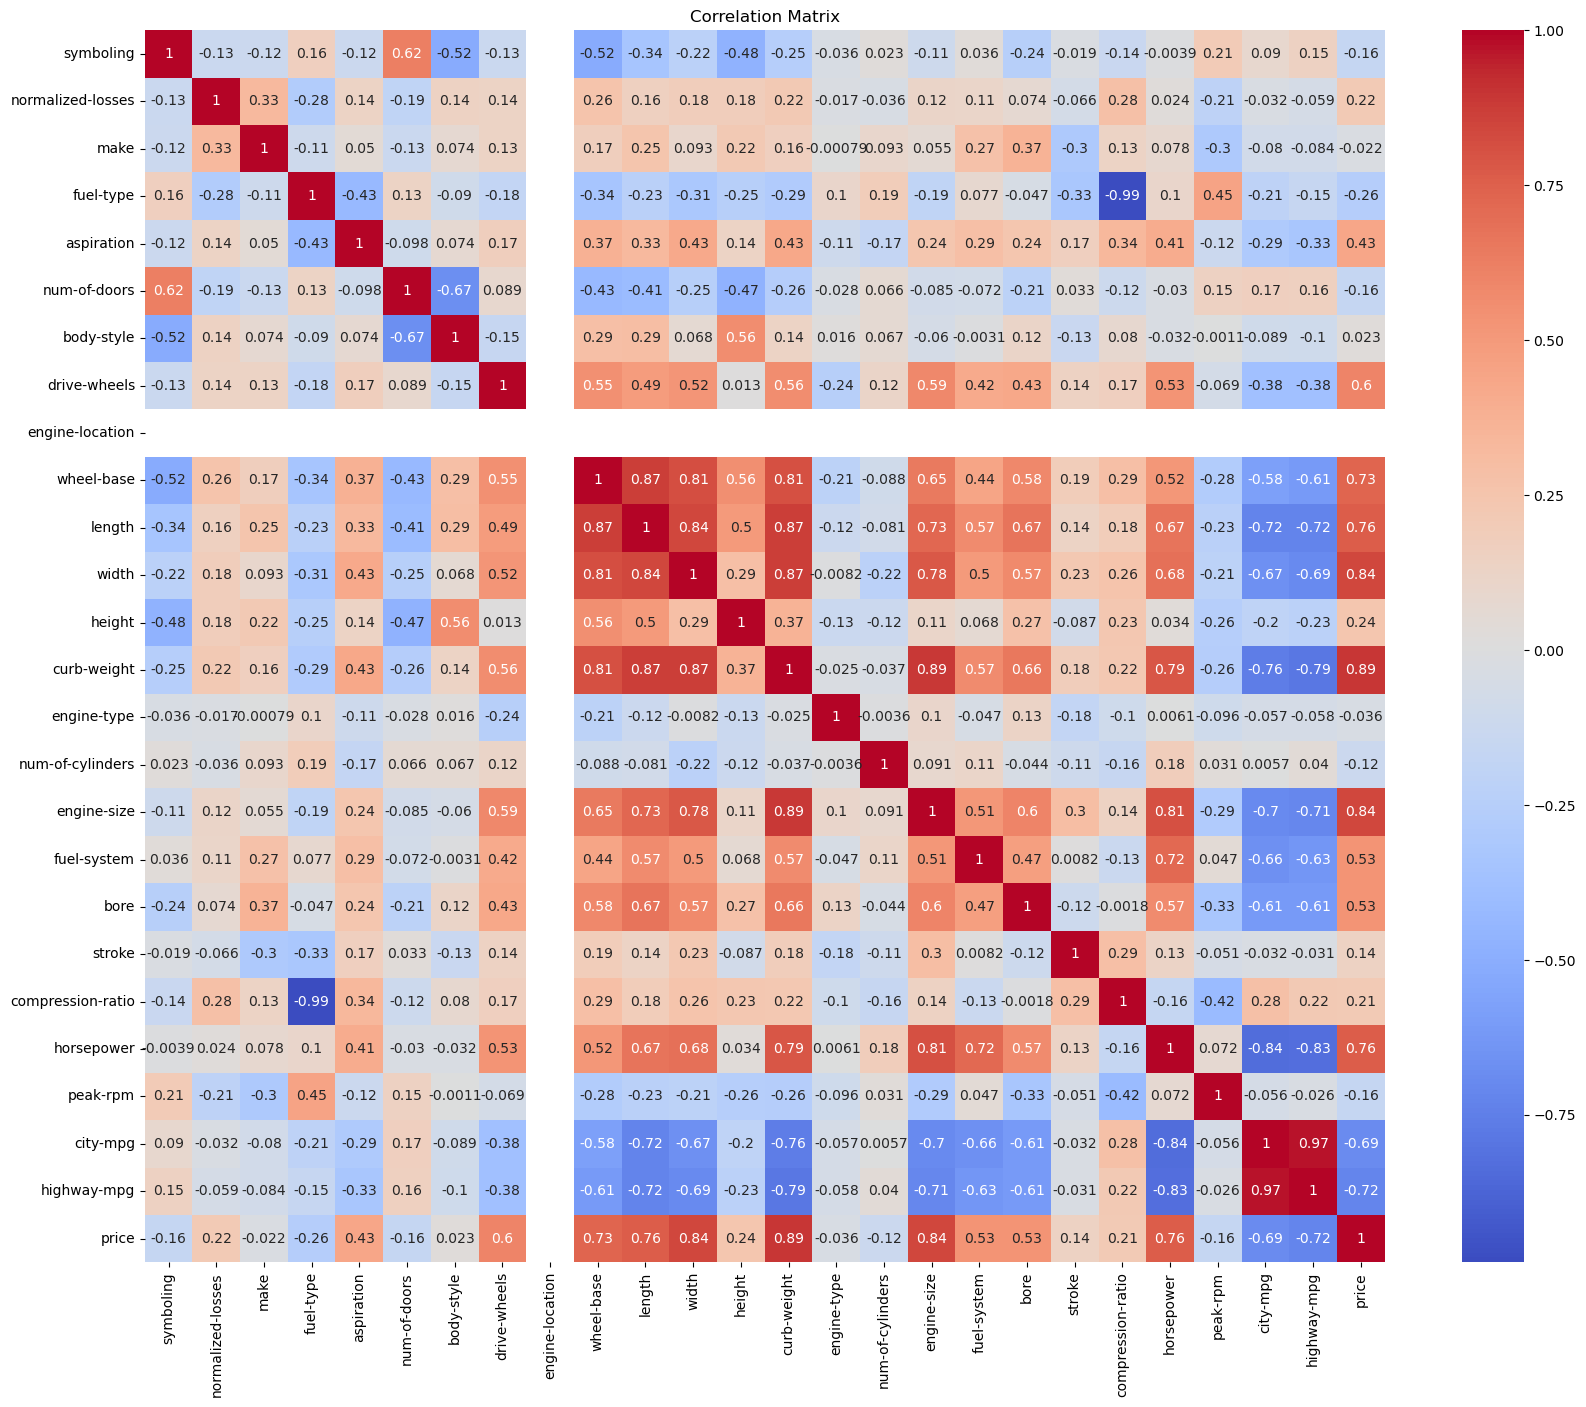

In [48]:
# Correlation matrix for numeric features
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Using Chi-Square Test with SelectKBest (Filter Method)

In [56]:
# Separate features and target
df['symboling'] = df['symboling'] + abs(df['symboling'].min()) # Shift the 'symboling' column to make it non-negative
X = df.drop("price", axis=1) # Features 
y = df["price"] # Target variable
# y
X

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
3,4,27,0,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,2,2,109,4,12,20,10.0,102.0,15,24,30
4,4,27,0,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,2,1,136,4,12,20,8.0,115.0,15,18,22
6,3,25,0,1,0,0,3,1,0,105.8,192.7,71.4,55.7,2844,2,1,136,4,12,20,8.5,110.0,15,19,25
8,3,25,0,1,1,0,3,1,0,105.8,192.7,71.4,55.9,3086,2,1,131,4,9,20,8.3,140.0,15,17,20
10,4,31,1,1,0,1,3,2,0,101.2,176.8,64.8,54.3,2395,2,2,108,4,22,4,8.8,101.0,17,23,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,49,17,1,0,0,3,2,0,109.1,188.8,68.9,55.5,2952,2,2,141,4,31,11,9.5,114.0,14,23,28
201,1,49,17,1,1,0,3,2,0,109.1,188.8,68.8,55.5,3049,2,2,141,4,31,11,8.7,160.0,13,19,25
202,1,49,17,1,0,0,3,2,0,109.1,188.8,68.9,55.5,3012,4,3,173,4,24,5,8.8,134.0,15,18,23
203,1,49,17,0,1,0,3,2,0,109.1,188.8,68.9,55.5,3217,2,3,145,2,5,20,23.0,106.0,7,26,27


In [63]:
# Apply SelectKBest for chi-square test
select_k_best = SelectKBest(chi2, k=6) # Selecting 5 best features 
print(select_k_best) # Try to print those 5 features #select_k_best

X_new = select_k_best.fit_transform(X, y)
X_new

SelectKBest(k=6, score_func=<function chi2 at 0x148b14b80>)


array([[2.700e+01, 2.337e+03, 1.090e+02, 1.200e+01, 2.000e+01, 1.020e+02],
       [2.700e+01, 2.824e+03, 1.360e+02, 1.200e+01, 2.000e+01, 1.150e+02],
       [2.500e+01, 2.844e+03, 1.360e+02, 1.200e+01, 2.000e+01, 1.100e+02],
       [2.500e+01, 3.086e+03, 1.310e+02, 9.000e+00, 2.000e+01, 1.400e+02],
       [3.100e+01, 2.395e+03, 1.080e+02, 2.200e+01, 4.000e+00, 1.010e+02],
       [3.100e+01, 2.395e+03, 1.080e+02, 2.200e+01, 4.000e+00, 1.010e+02],
       [3.000e+01, 2.710e+03, 1.640e+02, 1.500e+01, 1.300e+01, 1.210e+02],
       [3.000e+01, 2.765e+03, 1.640e+02, 1.500e+01, 1.300e+01, 1.210e+02],
       [1.200e+01, 1.488e+03, 6.100e+01, 1.000e+00, 6.000e+00, 4.800e+01],
       [5.000e+01, 1.874e+03, 9.000e+01, 6.000e+00, 1.000e+01, 7.000e+01],
       [4.000e+01, 1.909e+03, 9.000e+01, 6.000e+00, 1.000e+01, 7.000e+01],
       [1.000e+01, 1.876e+03, 9.000e+01, 3.000e+00, 1.500e+01, 6.800e+01],
       [1.000e+01, 1.876e+03, 9.000e+01, 3.000e+00, 1.500e+01, 6.800e+01],
       [1.000e+01, 2.128e

In [58]:
# Display selected features
selected_features = X.columns[select_k_best.get_support()]
print("Selected Features using Chi-Square Test:",
selected_features.tolist())

Selected Features using Chi-Square Test: ['normalized-losses', 'curb-weight', 'engine-size', 'bore', 'stroke', 'horsepower']


In [59]:
# check if any negative values
print((X < 0).any().any()) # This will print True if any negative values are present in the entire DataFrame

False


# Step 2: Recursive Feature Elimination (RFE) (Wrapper Method)

In [61]:
# Initialize a random forest classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42) # Define RFE (using the model to select features)
rfe = RFE(model, n_features_to_select=5) # Selecting 5 features
# Fit RFE
X_rfe = rfe.fit_transform(X, y)
selected_features_rfe = X.columns[rfe.support_]
print("Selected Features using RFE:", selected_features_rfe.tolist())

Selected Features using RFE: ['normalized-losses', 'height', 'curb-weight', 'horsepower', 'highway-mpg']


# Step 3: Lasso (Embedded Method)

In [62]:
# Initialize a random forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42) # Fit the model to get feature importances
model_rf.fit(X, y)
feature_importances = pd.Series(model_rf.feature_importances_,index=X.columns)
top_features_embedded = feature_importances.nlargest(5).index
print("Selected Features using Embedded Method (Random Forest):",top_features_embedded.tolist())

Selected Features using Embedded Method (Random Forest): ['curb-weight', 'normalized-losses', 'height', 'city-mpg', 'highway-mpg']
